In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

54.412918821387024 -168.1259531613169
-37.60806921007467 -0.009438262835629985
-33.0609427828319 -136.00980466142937
69.61049731522411 -119.64830678186885
-17.377335889802026 2.466727714881671
16.664131891058673 59.52275753217023
89.39810470625818 130.49524569454542
-21.46180336864741 102.84457531724365
-28.641114675756093 150.69528388645614
-82.14629138039622 -179.76471854790879
-32.695185665488225 -64.77482052099032
31.364802605181012 66.05001255046699
-83.07276218037667 32.376511135612105
14.906287958154152 -147.89065162049445
-51.04641568248575 141.74892345355744
-44.59600075594154 52.14814533624198
-20.615586330419916 58.190620155117244
-22.288468070135863 -70.16081587487838
-22.153739998521885 23.598665607688872
79.41245612962294 -178.7318810406016
-39.33627003885017 164.58374879681963
-58.5076329249871 74.67974041239489
68.22887065871384 113.8817134197543
-50.90400322682965 158.02476988367368
31.943836182165 -177.9232735024218
64.80323715303771 -92.85885131712462
-52.36832361164

75.06967182947685 57.42212132817292
-67.65393082621739 -166.3883129221589
24.847755470315448 -148.35356131423572
-42.80638771759083 105.24637385780585
40.422203914865776 -45.45645013715995
35.171896744254525 -177.32822241315048
18.43623323647671 139.42104377361056
-61.95329612196758 28.612147458767282
-58.99954207491886 -128.1329687398466
69.68703823895868 23.61471813344079
43.898050384933754 -146.92687008480667
67.12620328730293 26.45003733335392
-34.122728463984714 -19.935140116345394
-0.31285391541726426 -9.479666315287176
-26.764129822486375 -176.70346250320836
55.065968545341036 63.02087493386472
-29.600671118818987 153.48876715908807
27.15671748603927 72.57850500284891
72.48799934115448 -30.56171085361308
58.40950469028812 52.02534640165885
-44.1472624223423 135.96485072922832
28.04539618616819 -131.85676911563462
-57.366009903988065 31.537071705065898
87.60899953464317 158.2025597792798
-53.48978455080932 -163.16377157681129
-11.035045278891133 113.54689244239518
-30.52623767066

-25.13160761213544 66.57428332929106
-13.113227674910817 175.81300590369887
21.587397318425957 100.07169129530365
-5.989254427531591 -146.2826154133709
-73.83894103493404 -2.211112168637726
-80.07721833090187 110.11973176871186
-37.99634649219182 -80.77459153527683
-72.32615118714261 26.34756699193099
-14.170398205910487 -39.23379958476431
44.19016870747856 -9.458819240528868
-85.98585976025187 42.3329284276268
-13.039118836285127 30.149562691611948
-24.6925152473206 -9.290833393108358
-88.9417903680295 61.021705239123975
-40.851667519561644 129.252843520228
51.25569202536704 75.7015366772662
53.918467137807426 169.60931986146858
-35.99383904741022 -88.7838025707141
54.53842193028905 -91.22126428215988
-68.13949635856 -104.90480529498761
66.92189380947696 23.67682640701281
35.724666801343886 20.286423934458384
75.62988390670378 74.69704198117216
-16.150771471933297 -71.11749788637033
42.32357135133438 61.366657977472016
-40.57405429905773 -100.92254808906343
-56.26527576814268 -145.104

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8a393cc2b43298c0fe7b0a22b74e4ea3


In [9]:
# Import the time library and the datetime module from the datetime library 
# Starting URL for Weather Map API Call.
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

   # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | saldanha
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | norman wells
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | salalah
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | moree
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | rio cuarto
Processing Record 12 of Set 1 | qandahar
City not found. Skipping...
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | bambous virieux
Processing Record 18 of Set 1 | tocopilla
Processing Record 19 of Set 1 | tsienyane
City not found. Skipping...
Processing Record 20 of Set 1 | mys shmidta
City not found. Skipping...
Proc

Processing Record 38 of Set 4 | cap malheureux
Processing Record 39 of Set 4 | guye
Processing Record 40 of Set 4 | cobija
Processing Record 41 of Set 4 | bowen
Processing Record 42 of Set 4 | bud
Processing Record 43 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 44 of Set 4 | alotau
City not found. Skipping...
Processing Record 45 of Set 4 | itaituba
Processing Record 46 of Set 4 | dali
Processing Record 47 of Set 4 | cortes
Processing Record 48 of Set 4 | burns lake
Processing Record 49 of Set 4 | lenggries
Processing Record 50 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 1 of Set 5 | novo aripuana
Processing Record 2 of Set 5 | meulaboh
Processing Record 3 of Set 5 | praya
Processing Record 4 of Set 5 | jaen
Processing Record 5 of Set 5 | meyungs
City not found. Skipping...
Processing Record 6 of Set 5 | sernur
Processing Record 7 of Set 5 | northam
Processing Record 8 of Set 5 | dembi dolo
Processing Record 9 of Set 5 | vardo
Processing R

Processing Record 26 of Set 8 | pacific grove
Processing Record 27 of Set 8 | ambulu
Processing Record 28 of Set 8 | yining
Processing Record 29 of Set 8 | luderitz
Processing Record 30 of Set 8 | chitrakonda
Processing Record 31 of Set 8 | vallenar
Processing Record 32 of Set 8 | aykhal
Processing Record 33 of Set 8 | bonthe
Processing Record 34 of Set 8 | soe
Processing Record 35 of Set 8 | san vicente
Processing Record 36 of Set 8 | ilhabela
Processing Record 37 of Set 8 | rungata
City not found. Skipping...
Processing Record 38 of Set 8 | sao jose da coroa grande
Processing Record 39 of Set 8 | piedras
Processing Record 40 of Set 8 | kargasok
Processing Record 41 of Set 8 | stornoway
Processing Record 42 of Set 8 | muravlenko
Processing Record 43 of Set 8 | katherine
Processing Record 44 of Set 8 | divnomorskoye
Processing Record 45 of Set 8 | garmsar
Processing Record 46 of Set 8 | flin flon
Processing Record 47 of Set 8 | santa cruz
Processing Record 48 of Set 8 | kavieng
Process

Processing Record 11 of Set 12 | benjamin constant
Processing Record 12 of Set 12 | buchanan
Processing Record 13 of Set 12 | erdenet
Processing Record 14 of Set 12 | svay rieng
Processing Record 15 of Set 12 | jinka
Processing Record 16 of Set 12 | iskateley
Processing Record 17 of Set 12 | manacapuru
Processing Record 18 of Set 12 | natal
Processing Record 19 of Set 12 | kuche
City not found. Skipping...
Processing Record 20 of Set 12 | nisia floresta
Processing Record 21 of Set 12 | koungou
Processing Record 22 of Set 12 | khonuu
City not found. Skipping...
Processing Record 23 of Set 12 | padang
Processing Record 24 of Set 12 | satitoa
City not found. Skipping...
Processing Record 25 of Set 12 | puerto madryn
Processing Record 26 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 27 of Set 12 | shenjiamen
Processing Record 28 of Set 12 | belmonte
Processing Record 29 of Set 12 | belyy yar
Processing Record 30 of Set 12 | la primavera
Processing Record 31 of Set 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.3712,-73.4140,63.91,93,100,3.44,US,2022-05-21 04:47:33
1,Saldanha,-33.0117,17.9442,41.05,79,12,7.05,ZA,2022-05-21 04:48:05
2,Rikitea,-23.1203,-134.9692,74.28,76,19,7.11,PF,2022-05-21 04:47:24
3,Norman Wells,65.2820,-126.8329,55.44,41,75,0.00,CA,2022-05-21 04:48:05
4,Jamestown,42.0970,-79.2353,75.52,84,0,9.22,US,2022-05-21 04:48:06
5,Salalah,17.0151,54.0924,86.09,70,75,5.75,OM,2022-05-21 04:48:06
6,Tiksi,71.6872,128.8694,32.90,87,100,5.30,RU,2022-05-21 04:48:06
7,Carnarvon,-24.8667,113.6333,75.33,47,1,5.37,AU,2022-05-21 04:48:07
8,Moree,-29.4667,149.8500,58.89,80,100,10.78,AU,2022-05-21 04:48:07
9,Vaini,-21.2000,-175.2000,77.16,78,75,5.75,TO,2022-05-21 04:48:07


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [13]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2022-05-21 04:47:33,41.3712,-73.4140,63.91,93,100,3.44
1,Saldanha,ZA,2022-05-21 04:48:05,-33.0117,17.9442,41.05,79,12,7.05
2,Rikitea,PF,2022-05-21 04:47:24,-23.1203,-134.9692,74.28,76,19,7.11
3,Norman Wells,CA,2022-05-21 04:48:05,65.2820,-126.8329,55.44,41,75,0.00
4,Jamestown,US,2022-05-21 04:48:06,42.0970,-79.2353,75.52,84,0,9.22
5,Salalah,OM,2022-05-21 04:48:06,17.0151,54.0924,86.09,70,75,5.75
6,Tiksi,RU,2022-05-21 04:48:06,71.6872,128.8694,32.90,87,100,5.30
7,Carnarvon,AU,2022-05-21 04:48:07,-24.8667,113.6333,75.33,47,1,5.37
8,Moree,AU,2022-05-21 04:48:07,-29.4667,149.8500,58.89,80,100,10.78
9,Vaini,TO,2022-05-21 04:48:07,-21.2000,-175.2000,77.16,78,75,5.75


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

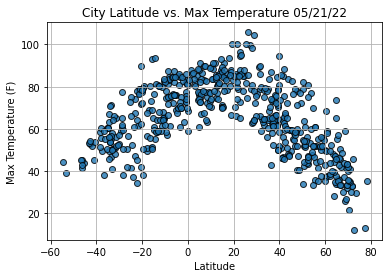

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

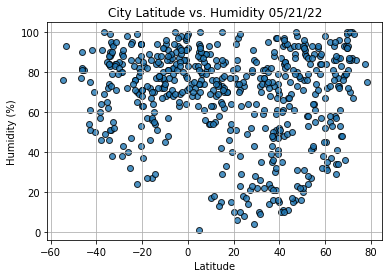

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

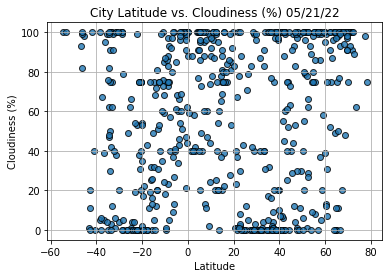

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

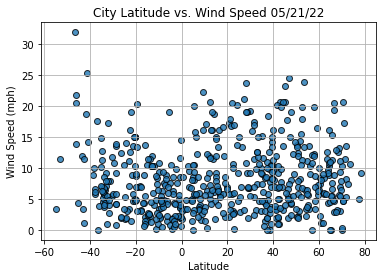

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()